## Initial Notebook to Read and Section RSSI Data

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

2022-11-06 17:09:47.154034: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-06 17:09:47.226765: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-06 17:09:47.229960: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: 
2022-11-06 17:09:47.229972: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerr

In [34]:
df = pd.read_csv("data/collected_rssi.csv")

In [35]:
# Drop values with over 50% zeros
df = df.loc[:, (df != 0).mean() > 0.5]

In [36]:
df

,D0:4D:C6:02:E5:C0,D0:4D:C6:02:95:61,D0:4D:C6:02:95:70,D0:4D:C6:02:47:F0,D0:4D:C6:02:47:E0,D0:4D:C6:02:C2:81,D0:4D:C6:01:E6:20,D0:4D:C6:02:C2:80,D0:4D:C6:01:E6:21,D0:4D:C6:02:7E:50,...,D0:4D:C6:02:95:60,D0:4D:C6:03:4D:40,D0:4D:C6:03:4D:50,D0:4D:C6:02:E5:D1,D0:4D:C6:02:95:71,40:E3:D6:24:25:23,00:4E:35:CF:2E:40,40:E3:D6:24:25:22,x,y
0,43,64,63,32,41,33,37,0,33,31,...,64,45,0,0,63,36,40,36,1.0,5.0
1,0,69,62,43,47,31,0,31,0,0,...,70,42,0,31,61,0,40,0,4.0,12.0
2,44,55,46,0,0,36,32,36,32,34,...,55,51,42,0,46,0,0,0,11.0,4.0
3,0,62,57,31,40,31,31,31,0,31,...,62,47,38,33,57,37,38,0,5.0,12.0
4,45,64,57,33,40,31,0,31,0,31,...,64,45,39,31,59,37,36,37,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,47,61,60,32,0,31,31,31,31,33,...,61,45,43,35,60,33,40,0,3.0,7.0
282,0,62,64,31,0,0,35,0,35,33,...,62,52,40,0,64,0,37,0,5.0,3.0
283,47,59,57,34,38,40,36,40,0,33,...,0,50,44,37,57,36,40,35,6.0,1.0
284,0,66,60,37,0,31,31,31,31,31,...,66,38,33,0,0,0,43,0,4.0,12.0


In [37]:
dftest = df.loc[(df['x'] == 5) & (df['y'] == 12)]
dftest2 = df.loc[(df['x'] == 3) & (df['y'] == 3)]

In [38]:
data = df.iloc[:,:-2].to_numpy() / 70 # This normalizes the RSSI values which are between 0 and 70
labels = df.iloc[:, -2:].to_numpy() / 12 # This normalizes our x and y which are between 0 and 12

In [39]:
np.shape(data)

(286, 31)

In [40]:
np.shape(labels)

(286, 2)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(data, labels) # May want to use k-folds instead

## Test Network

In [42]:
#very basic model, will need to improve
model=keras.Sequential([
    keras.layers.Dense(20,input_dim=31,activation='relu'),
    keras.layers.BatchNormalization(center=True, scale=True),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(2)
])

model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(), metrics=['mae','mse'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 20)                640       
                                                                 
 batch_normalization_3 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 dense_19 (Dense)            (None, 200)               4200      
                                                                 
 dense_20 (Dense)            (None, 2)                 402       
                                                                 
Total params: 5,322
Trainable params: 5,282
Non-trainable params: 40
_________________________________________________________________


In [43]:
EPOCHS = 500

history = model.fit(
  x_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.2558,  mae:0.4199,  mse:0.2558,  val_loss:0.1950,  val_mae:0.3368,  val_mse:0.1950,  
....................................................................................................
Epoch: 100, loss:0.0086,  mae:0.0739,  mse:0.0086,  val_loss:0.0886,  val_mae:0.2330,  val_mse:0.0886,  
....................................................................................................
Epoch: 200, loss:0.0061,  mae:0.0607,  mse:0.0061,  val_loss:0.0911,  val_mae:0.2366,  val_mse:0.0911,  
....................................................................................................
Epoch: 300, loss:0.0052,  mae:0.0528,  mse:0.0052,  val_loss:0.0859,  val_mae:0.2300,  val_mse:0.0859,  
....................................................................................................
Epoch: 400, loss:0.0033,  mae:0.0447,  mse:0.0033,  val_loss:0.0837,  val_mae:0.2284,  val_mse:0.0837,  
........................................................................

In [44]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} points".format(mae))

# Note that this is the normalized MAE. So in reality, our actual mae is 2.5 feet

3/3 - 0s - loss: 0.0733 - mae: 0.2056 - mse: 0.0733 - 12ms/epoch - 4ms/step
Testing set Mean Abs Error:  0.21 points


In [45]:
test_predictions = model.predict(x_test)

3/3 [==============================] - 0s 705us/step


In [46]:
# it performed really poorly, but this is a general idea of what we should be doing
print(y_test[:5] * 12)
print(test_predictions[:5] * 12)

[[ 1.  2.]
 [ 1.  9.]
 [ 4.  6.]
 [ 3. 11.]
 [11.  4.]]
[[ 6.3631134  3.9823444]
 [ 2.718928   6.549961 ]
 [ 2.900573   8.012068 ]
 [ 3.6431832 10.550407 ]
 [ 4.7812877  5.244308 ]]


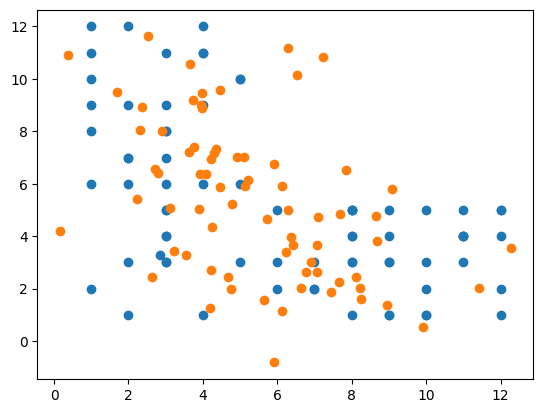

In [48]:
import matplotlib.pyplot as plt
plt.scatter(y_test[:, 0] * 12, y_test[:, 1] * 12)
plt.scatter(test_predictions[:, 0] * 12, test_predictions[:, 1] * 12)
plt.show()

In [49]:
# this site may be useful in the future: https://machinelearningmastery.com/deep-learning-models-for-multi-output-regression/

In [50]:
# Demonstrate what would happen if the robot collected RSSI values at a given spot 3 times and then averaged the predictions
# location 5,12
# These values are overly optimistic since the data points haven't been removed from our training data
datatest = dftest.iloc[:,:-2].to_numpy() / 70
labelstest = dftest.iloc[:, -2:].to_numpy() / 12
test_predictions1 = model.predict(datatest)
print(np.mean(labelstest, axis=0))
print(np.mean(test_predictions1, axis=0))

1/1 [==============================] - 0s 10ms/step
[0.41666667 1.        ]
[0.42056274 1.0909952 ]


In [51]:
# Demonstrate what would happen if the robot collected RSSI values at a given spot 3 times and then averaged the predictions
# location 3,3
# These values are overly optimistic since the data points haven't been removed from our training data
datatest = dftest2.iloc[:,:-2].to_numpy() / 70
labelstest = dftest2.iloc[:, -2:].to_numpy() / 12
test_predictions1 = model.predict(datatest)
print(np.mean(labelstest, axis=0))
print(np.mean(test_predictions1, axis=0))

1/1 [==============================] - 0s 10ms/step
[0.25 0.25]
[0.390942  0.3181459]
